## Hyper Parameter Tuning

#### - By Swetha Ramanadham, D19031

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn.ensemble as ensemble
import sklearn

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

In [3]:
os.chdir("C:\\Users\\R swetha\\Desktop\\ML Assignment\\DATASETS")
churn = pd.read_csv("Churn_Modelling.csv")
churn.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.shape

(10000, 14)

In [5]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
data=churn
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### Performing Oversampling

In [10]:
from sklearn.utils import resample
from sklearn.utils import shuffle
data_zero = data[data.Exited==0]
data_one = data[data.Exited==1]

#oversampling 1's
data_newone=resample(data_one,replace=True,n_samples=5000)

newsample=pd.concat([data_zero,data_newone])
#Shuffling
newsample = shuffle(newsample)


In [11]:
print("Shape",newsample.shape)
print(newsample['Exited'].value_counts())
newsample.head()

Shape (12963, 11)
0    7963
1    5000
Name: Exited, dtype: int64


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8217,605,Germany,Male,75,2,61319.63,1,0,1,186655.11,0
4766,659,Spain,Female,38,9,0.00,2,1,1,35701.06,0
4808,643,France,Female,33,0,137811.75,1,1,1,184856.89,0
7633,661,Germany,Female,47,0,109493.62,1,0,0,188324.01,1
6092,601,Germany,Male,43,3,141859.12,2,1,1,111249.62,0


In [12]:
encoded = pd.get_dummies(newsample[['Gender','Geography']])
encoded.columns

Index(['Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [13]:
newsample = newsample.drop(columns=['Gender','Geography'],axis=1)
newsample.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8217,605,75,2,61319.63,1,0,1,186655.11,0
4766,659,38,9,0.00,2,1,1,35701.06,0
4808,643,33,0,137811.75,1,1,1,184856.89,0
7633,661,47,0,109493.62,1,0,0,188324.01,1
6092,601,43,3,141859.12,2,1,1,111249.62,0


In [14]:
newsample = pd.concat([newsample,encoded[['Gender_Female','Gender_Male','Geography_France','Geography_Germany','Geography_Spain']]],axis=1)
newsample.head(3)
newsample.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Gender_Female        0
Gender_Male          0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [15]:
newdata = newsample.drop("Exited",axis=1)
X=newdata.loc[:]
Y=newsample.loc[:,["Exited"]]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.37,random_state=1) #Splitting into test and train
print("Xtrain shape",X_train.shape)
print("Ytrain shape",Y_train.shape)
print("Xtest shape",X_test.shape)
print("Ytestshape",Y_test.shape)

Xtrain shape (8166, 13)
Ytrain shape (8166, 1)
Xtest shape (4797, 13)
Ytestshape (4797, 1)


In [16]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Bagging


In [56]:
#Created a Bagged Decision Tree model object
baggedModel =ensemble.BaggingClassifier(base_estimator=None,oob_score=True) 
baggedModel

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=True, random_state=None, verbose=0,
                  warm_start=False)

In [57]:
baggedModel.fit(X_train,Y_train.values.ravel())

C:\ANACONDA\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ANACONDA\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=True, random_state=None, verbose=0,
                  warm_start=False)

In [58]:
print("OOb score",baggedModel.oob_score_)
base_accuracy = baggedModel.score(X_test,Y_test)
pred = baggedModel.predict(X_test)
baseaccuracy_bagged = sklearn.metrics.accuracy_score(Y_test,pred, normalize=True, sample_weight=None)
print("Accuarcy:",baseaccuracy_bagged)

OOb score 0.869826108253735
Accuarcy: 0.8936835522201376


### Testing accuracy for different values of each hyperparameter

### Max Sample size

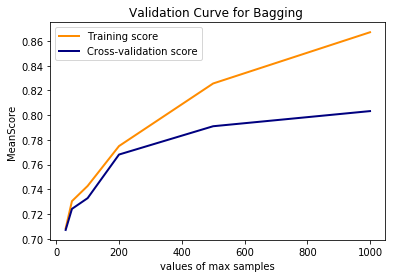

In [68]:
max_samplesbag= [30,50,100,200,500,1000]
train_scores, test_scores = validation_curve(ensemble.BaggingClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'max_samples',param_range = max_samplesbag , cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Bagging ")
plt.xlabel("values of max samples")
plt.ylabel("MeanScore")
lw = 2
plt.plot(max_samplesbag, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(max_samplesbag, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

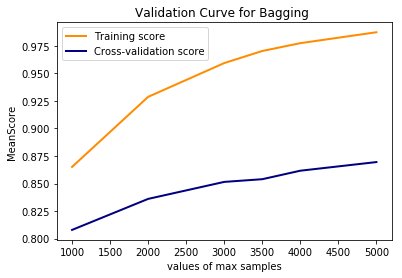

In [173]:
max_samplesbag= [1000,2000,3000,3500,4000,5000]
train_scores, test_scores = validation_curve(ensemble.BaggingClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'max_samples',param_range = max_samplesbag , cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Bagging ")
plt.xlabel("values of max samples")
plt.ylabel("MeanScore")
lw = 2
plt.plot(max_samplesbag, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(max_samplesbag, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Observation:
        Accuracy is increasing with increase in sample size.best sample size is 5000

### Max features

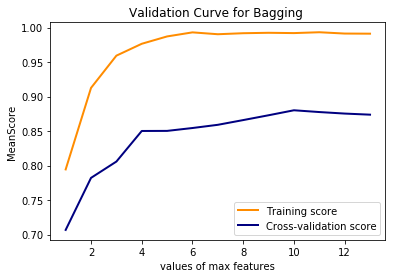

In [102]:
maxfeaturesbag= [i for i in range(1,14)]
train_scores, test_scores = validation_curve(ensemble.BaggingClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'max_features',param_range = maxfeaturesbag , cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Bagging ")
plt.xlabel("values of max features")
plt.ylabel("MeanScore")
lw = 2
plt.plot(maxfeaturesbag, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(maxfeaturesbag, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

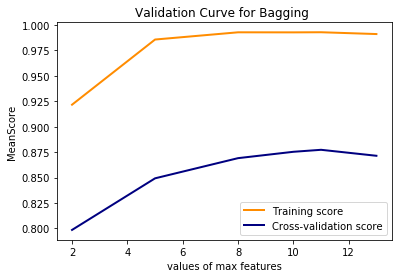

In [170]:
maxfeaturesbag= [2,5,8,10,11,13]
train_scores, test_scores = validation_curve(ensemble.BaggingClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'max_features',param_range = maxfeaturesbag , cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Bagging ")
plt.xlabel("values of max features")
plt.ylabel("MeanScore")
lw = 2
plt.plot(maxfeaturesbag, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(maxfeaturesbag, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Observation: best max no of features is 11

### No of estimators

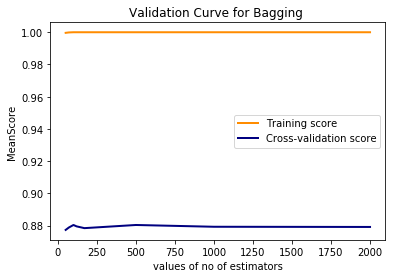

In [21]:
noofestimatorsbag = [50,70,100,120,170,500,1000,2000]
train_scores, test_scores = validation_curve(ensemble.BaggingClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'n_estimators',param_range = noofestimatorsbag , cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Bagging ")
plt.xlabel("values of no of estimators")
plt.ylabel("MeanScore")
lw = 2
plt.plot(noofestimatorsbag, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(noofestimatorsbag, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Observation:
         With very high no of estimators like above 1000; there was not much significant increase in accuracy.

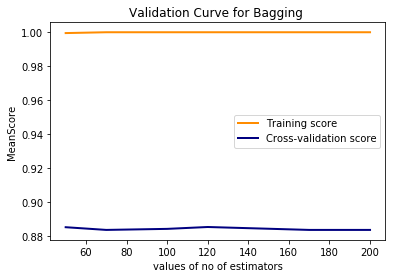

In [111]:
noofestimatorsbag = [50,70,100,120,170,200]
train_scores, test_scores = validation_curve(ensemble.BaggingClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'n_estimators',param_range = noofestimatorsbag , cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Bagging ")
plt.xlabel("values of no of estimators")
plt.ylabel("MeanScore")
lw = 2
plt.plot(noofestimatorsbag, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(noofestimatorsbag, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

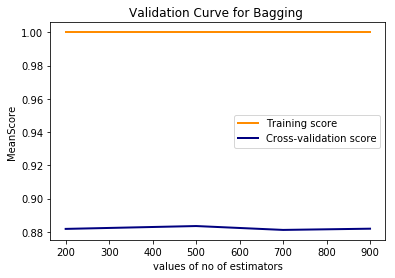

In [94]:
noofestimatorsbag = [200,500,700,900]
train_scores, test_scores = validation_curve(ensemble.BaggingClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'n_estimators',param_range = noofestimatorsbag , cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Bagging ")
plt.xlabel("values of no of estimators")
plt.ylabel("MeanScore")
lw = 2
plt.plot(noofestimatorsbag, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(noofestimatorsbag, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Observation : best accuracy is at no of estimators = 500

In [98]:
#WITH max_samples = 50,no of estimators = 50
baggedModel1 =ensemble.BaggingClassifier(base_estimator=None,max_samples=50,n_estimators=50,oob_score=True) 
baggedModel1.fit(X_train,Y_train.values.ravel())
pred1=baggedModel.predict(X_test)
print("OOb score",baggedModel1.oob_score_)
print("Accuracy",baggedModel1.score(X_test,Y_test))

OOb score 0.7612049963262307
Accuracy 0.7665207421304983


In [99]:
#WITH  max_samples =500,no of estimators =50
baggedModel3 =ensemble.BaggingClassifier(base_estimator=None,max_samples=500,n_estimators=50,oob_score=True) 
baggedModel3.fit(X_train,Y_train.values.ravel())
print("OOb score",baggedModel3.oob_score_)
print("Accuracy",baggedModel3.score(X_test,Y_test))

OOb score 0.8087190791084986
Accuracy 0.8107150302272254


Observation : There was increase in accuracy with increase in max_samples from 50 to 500

In [100]:
#WITH no of estimators = 200
baggedModel1 =ensemble.BaggingClassifier(base_estimator=None,n_estimators=200,oob_score=True) 
baggedModel1.fit(X_train,Y_train.values.ravel())
pred1=baggedModel.predict(X_test)
print("OOb score",baggedModel1.oob_score_)
print("Accuracy",baggedModel1.score(X_test,Y_test))

OOb score 0.9066862601028656
Accuracy 0.9053575151136126


In [27]:
#WITH no of estimators = 1000
baggedModel7 =ensemble.BaggingClassifier(base_estimator=None,n_estimators=1000,oob_score=True) 
baggedModel7.fit(X_train,Y_train.values.ravel())
pred1=baggedModel.predict(X_test)
print("OOb score",baggedModel7.oob_score_)
print("Accuracy",baggedModel7.score(X_test,Y_test))

OOb score 0.9087680626989958
Accuracy 0.9159891598915989


Observation : There was decrease in accuracy with increase in no of estimators from 100 to 500

In [97]:
#WITH MAX Features = 2,no of estimators =50
baggedModel2 =ensemble.BaggingClassifier(base_estimator=None,max_features=2,n_estimators=50,oob_score=True) 
baggedModel2.fit(X_train,Y_train.values.ravel())
print("OOb score",baggedModel2.oob_score_)
print("Accuracy",baggedModel2.score(X_test,Y_test))

OOb score 0.8488856233161891
Accuracy 0.8763810715030227


In [95]:
#WITH MAX Features =8,no of estimators =50
baggedModel3 =ensemble.BaggingClassifier(base_estimator=None,max_features=8,n_estimators=50,oob_score=True) 
baggedModel3.fit(X_train,Y_train.values.ravel())
print("OOb score",baggedModel3.oob_score_)
print("Accuracy",baggedModel3.score(X_test,Y_test))

OOb score 0.9123193730100416
Accuracy 0.9193245778611632


Observation : 
With increase in no of max_features accuracy is increasing

### Finding Best scores of hyper parameters Using Grid Search CV

In [21]:
n_estimators = [50,70,100,120,170,200]
max_features = [2,5,10,13]
tuned_parameters = {'n_estimators': n_estimators,
               'max_features': max_features}
print(tuned_parameters)

random =ensemble.BaggingClassifier()
random = GridSearchCV(random,param_grid=tuned_parameters,cv=3,scoring='roc_auc')
random.fit(X_train,Y_train.values.ravel())
print("best params",random.best_params_)
print("best score",random.best_score_)
print("Best estimator",random.best_estimator_)

{'n_estimators': [50, 70, 100, 120, 170, 200], 'max_features': [2, 5, 10, 13]}
best params {'max_features': 10, 'n_estimators': 200}
best score 0.9437370922603219
Best estimator BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=10, max_samples=1.0, n_estimators=200,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


In [20]:
max_samples=[1000,2000,3000,3500,4000,5000]
tuned_parameters = {
               'max_samples': max_samples}
print(tuned_parameters)

random =ensemble.BaggingClassifier()
random = GridSearchCV(random,param_grid=tuned_parameters,cv=3,scoring='roc_auc')
random.fit(X_train,Y_train.values.ravel())
print("best params",random.best_params_)
print("best score",random.best_score_)
print("Best estimator",random.best_estimator_)

{'max_samples': [1000, 2000, 3000, 3500, 4000, 5000]}
best params {'max_samples': 5000}
best score 0.9188951647790311
Best estimator BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=5000, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


### Tuning the model with best scores of hyper parameters

scores from grid search CV

In [34]:
#WITH MAX Features =11,max_samples =5000,no of estimators =120,max_samples =5000
baggedModel3 =ensemble.BaggingClassifier(max_features=11,max_samples=5000,n_estimators=120,oob_score=True) 
baggedModel3.fit(X_train,Y_train.values.ravel())
print("OOb score",baggedModel3.oob_score_)
pred2 = baggedModel3.predict(X_test)
grid_baggedaccuracy = sklearn.metrics.accuracy_score(Y_test,pred2, normalize=True, sample_weight=None)
print("Accuracy",grid_baggedaccuracy)

OOb score 0.905339211364193
Accuracy 0.9049405878674172


In [95]:
#max_features=10,max_samples=5000,n_estimators=500
baggedModel3 =ensemble.BaggingClassifier(max_features=10,max_samples=5000,n_estimators=500,oob_score=True) 
baggedModel3.fit(X_train,Y_train.values.ravel())
print("OOb score",baggedModel3.oob_score_)
pred2 = baggedModel3.predict(X_test)
grid_baggedaccuracy = sklearn.metrics.accuracy_score(Y_test,pred2, normalize=True, sample_weight=None)
print("Accuracy",grid_baggedaccuracy)

OOb score 0.9162380602498164
Accuracy 0.9103606420679592


In [100]:
print(metrics.classification_report(Y_test,baggedModel3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2957
           1       0.88      0.89      0.88      1840

    accuracy                           0.91      4797
   macro avg       0.90      0.91      0.91      4797
weighted avg       0.91      0.91      0.91      4797



In [98]:
print('Improvement of Accuracy with tuning: {:0.2f}%.'.format( 100 * (grid_baggedaccuracy - baseaccuracy_bagged) / baseaccuracy_bagged))

Improvement of Accuracy with tuning: 1.87%.


## Random Forests

In [41]:
#Before tuning
randomForest = ensemble.RandomForestClassifier(n_estimators=2,oob_score=True)
randomForest.fit(X_train,Y_train.values.ravel())
print("OOb score: ",randomForest.oob_score_)
pred = randomForest.predict(X_test)
baseaccuracy_randomforest = sklearn.metrics.accuracy_score(Y_test,pred, normalize=True, sample_weight=None)
print("Accuarcy:",baseaccuracy_randomforest)


OOb score:  0.7473671320107764
Accuarcy: 0.8538670002084636


C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [132]:
print(metrics.classification_report(Y_test,randomForest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2994
           1       0.88      0.70      0.78      1803

    accuracy                           0.85      4797
   macro avg       0.86      0.82      0.84      4797
weighted avg       0.86      0.85      0.85      4797



### checking the accuracy for different values of hyperparameters

### Min Samples for Split

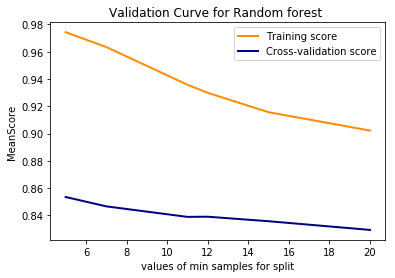

In [44]:
min_samples_split= [5,7,11,12,15,20]
train_scores, test_scores = validation_curve(RandomForestClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'min_samples_split',param_range = min_samples_split , cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Random forest ")
plt.xlabel("values of min samples for split")
plt.ylabel("MeanScore")
lw = 2
plt.plot(min_samples_split, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(min_samples_split, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

 Observation : Mean score is decreasing with increase in Min sample split for both validation and train

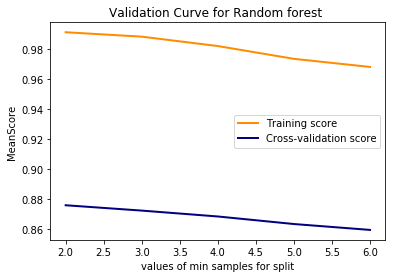

In [145]:
min_samples_split= [2,3,4,5,6]
train_scores, test_scores = validation_curve(RandomForestClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'min_samples_split',param_range = min_samples_split , cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Random forest ")
plt.xlabel("values of min samples for split")
plt.ylabel("MeanScore")
lw = 2
plt.plot(min_samples_split, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(min_samples_split, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Observation:Best min sample split is 2or 3
mean score went down for both the training and cross-validation sets for higher values of min_samples_split

## Max Depth

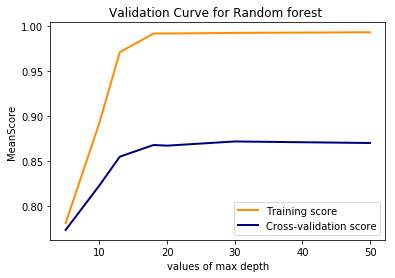

In [48]:
maxdepth= [5,10,13,18,20,30,50]
train_scores, test_scores = validation_curve(RandomForestClassifier(),X = X_train, y = Y_train.values.ravel(), 
                                param_name = 'max_depth',param_range = maxdepth , cv = 3)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Random forest ")
plt.xlabel("values of max depth")
plt.ylabel("MeanScore")
lw = 2
plt.plot(maxdepth, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(maxdepth, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Mean Score increased from 0-20 depth ,after a max depth of 18 the accuracy remained constant for both validation and train.

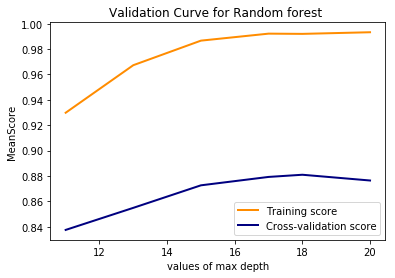

In [147]:
maxdepth= [11,13,15,17,18,20]
train_scores, test_scores = validation_curve(RandomForestClassifier(),X = X_train, y = Y_train.values.ravel(), 
                                param_name = 'max_depth',param_range = maxdepth , cv = 3)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Random forest ")
plt.xlabel("values of max depth")
plt.ylabel("MeanScore")
lw = 2
plt.plot(maxdepth, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(maxdepth, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

best max depth is at 18

## Max Features

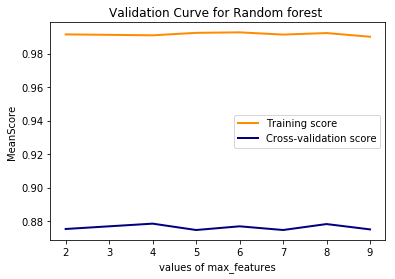

In [149]:
maxfeatures= [2,4,5,6,7,8,9]
train_scores, test_scores = validation_curve(RandomForestClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'max_features',param_range = maxfeatures , cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Random forest ")
plt.xlabel("values of max_features")
plt.ylabel("MeanScore")
lw = 2
plt.plot(maxfeatures, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(maxfeatures, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

best  no of features is 8

### No of estimators

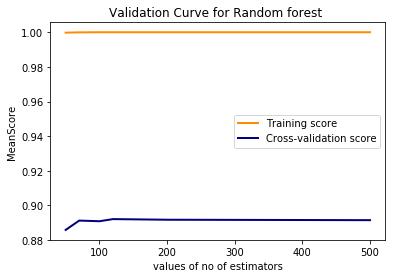

In [23]:
noofestimators= [50,70,100,120,200,500]
train_scores, test_scores = validation_curve(RandomForestClassifier(),X = X_train, y = Y_train.values.ravel(), 
                                             param_name = 'n_estimators',param_range = noofestimators , cv = 3)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Random forest ")
plt.xlabel("values of no of estimators")
plt.ylabel("MeanScore")
lw = 2
plt.plot(noofestimators, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(noofestimators, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

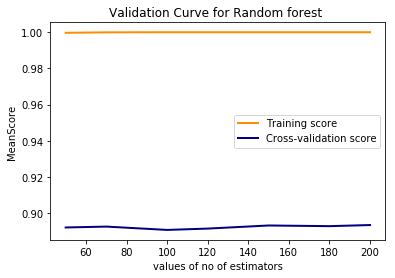

In [138]:
noofestimators= [50,70,100,120,150,180,200]
train_scores, test_scores = validation_curve(RandomForestClassifier(),X = X_train, y = Y_train.values.ravel(), 
                                             param_name = 'n_estimators',param_range = noofestimators , cv = 3)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Random forest ")
plt.xlabel("values of no of estimators")
plt.ylabel("MeanScore")
lw = 2
plt.plot(noofestimators, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(noofestimators, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

As number of estimators are increasing the accuracy is decreasing.Best no of estimators is 150

## Min Samples Leaf

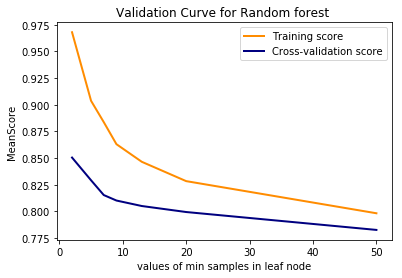

In [52]:
minsamples= [2,5,7,9,13,20,50]
train_scores, test_scores = validation_curve(RandomForestClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'min_samples_leaf',param_range = minsamples , cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Random forest ")
plt.xlabel("values of min samples in leaf node")
plt.ylabel("MeanScore")
lw = 2
plt.plot(minsamples, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(minsamples, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

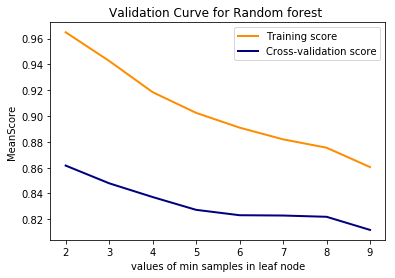

In [140]:
minsamples= [i for i in range(2,10)]
train_scores, test_scores = validation_curve(RandomForestClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'min_samples_leaf',param_range = minsamples , cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Random forest ")
plt.xlabel("values of min samples in leaf node")
plt.ylabel("MeanScore")
lw = 2
plt.plot(minsamples, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(minsamples, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

best min samples 2 ,As no of min samples in node is increasing accuracy is decreasing

### Max_leaf_nodes

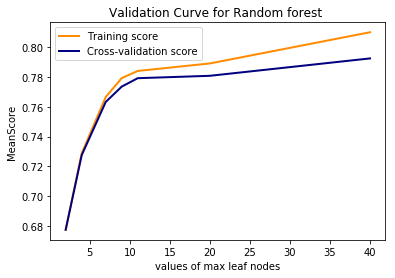

In [49]:
max_leaf_nodes=[2,4,7,9,11,20,40]
train_scores, test_scores = validation_curve(RandomForestClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'max_leaf_nodes',param_range = max_leaf_nodes, cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Random forest ")
plt.xlabel("values of max leaf nodes")
plt.ylabel("MeanScore")
lw = 2
plt.plot(max_leaf_nodes, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(max_leaf_nodes, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Observation : Accuracy increases with increase in max leaf nodes

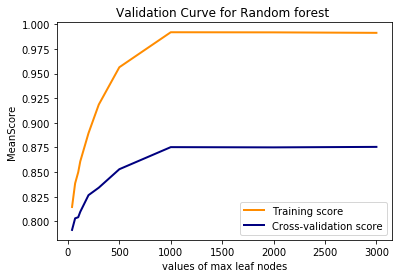

In [153]:
max_leaf_nodes=[40,70,100,120,200,300,500,1000,2000,3000]
train_scores, test_scores = validation_curve(RandomForestClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'max_leaf_nodes',param_range = max_leaf_nodes, cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Random forest ")
plt.xlabel("values of max leaf nodes")
plt.ylabel("MeanScore")
lw = 2
plt.plot(max_leaf_nodes, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(max_leaf_nodes, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Accuracy is increased drastically with increase in no of leaf nodes.
best max leaf nodes is 1000

### Testing the accuracy for different values of each Hyper parameter

In [29]:
randomForest1 = ensemble.RandomForestClassifier(min_samples_leaf=5,oob_score=True)
randomForest1.fit(X_train,Y_train.values.ravel())
print("OOb score: ",randomForest1.oob_score_)
print("Accuracy : ",randomForest1.score(X_test,Y_test.values.ravel()))

OOb score:  0.8589272593681117
Accuracy :  0.8619970815092767


In [30]:
randomForest2 = ensemble.RandomForestClassifier(min_samples_leaf=10,oob_score=True)
randomForest2.fit(X_train,Y_train.values.ravel())
print("OOb score: ",randomForest2.oob_score_)
print("Accuracy : ",randomForest2.score(X_test,Y_test.values.ravel()))

OOb score:  0.8292921871173157
Accuracy :  0.8340629560141756


Observation: As no of min sample leaves and no of estimators increase accuracy is decreasing

In [36]:
randomForest3 = ensemble.RandomForestClassifier(n_estimators=50,max_features=3,min_samples_split=20,oob_score=True)
randomForest3.fit(X_train,Y_train.values.ravel())
print("OOb score: ",randomForest3.oob_score_)
print("Accuracy : ",randomForest3.score(X_test,Y_test.values.ravel()))

OOb score:  0.85513103110458
Accuracy :  0.8528246820929748


In [37]:
randomForest4 = ensemble.RandomForestClassifier(n_estimators=50,max_features=10,min_samples_split=50,oob_score=True)
randomForest4.fit(X_train,Y_train.values.ravel())
print("OOb score: ",randomForest4.oob_score_)
print("Accuracy : ",randomForest4.score(X_test,Y_test.values.ravel()))

OOb score:  0.828679892236101
Accuracy :  0.8267667292057536


As no of min sample split ,max features increase accuracy is decreasing

In [43]:
randomForest4 = ensemble.RandomForestClassifier(n_estimators=50,max_depth=7,oob_score=True)
randomForest4.fit(X_train,Y_train.values.ravel())
print("OOb score: ",randomForest4.oob_score_)
print("Accuracy : ",randomForest4.score(X_test,Y_test.values.ravel()))

OOb score:  0.807739407298555
Accuracy :  0.8075880758807588


In [46]:
randomForest5 = ensemble.RandomForestClassifier(n_estimators=50,max_depth=30,oob_score=True)
randomForest5.fit(X_train,Y_train.values.ravel())
print("OOb score: ",randomForest5.oob_score_)
print("Accuracy : ",randomForest5.score(X_test,Y_test.values.ravel()))

OOb score:  0.9109723242713691
Accuracy :  0.9170314780070877


As depth of the tree is increasing accuracy is increasing

### Using Grid Search CV

In [44]:
tuned_parameters2 =[{'max_leaf_nodes':[40,100,120,300,500,1000],'n_estimators':[50,100,120,150,180,200]}]
randomforest6 = RandomForestClassifier()
randomforest6 = GridSearchCV(randomforest6,tuned_parameters2,cv=3,scoring='roc_auc')
randomforest6.fit(X_train,Y_train.values.ravel())
print("best params",randomforest6.best_params_)
print("best score",randomforest6.best_score_)

best params {'max_leaf_nodes': 1000, 'n_estimators': 120}
best score 0.9417776395091579


In [45]:
tuned_parameters3 =[{'max_depth':[11,13,15,17,18,20],'min_samples_leaf':[2,3,5,7,9]}]
randomforest6 = RandomForestClassifier()
randomforest6 = GridSearchCV(randomforest6,tuned_parameters3,cv=3,scoring='roc_auc')
randomforest6.fit(X_train,Y_train.values.ravel())
print("best params",randomforest6.best_params_)
print("best score",randomforest6.best_score_)


best params {'max_depth': 17, 'min_samples_leaf': 2}
best score 0.9164463198911985


In [46]:
tuned_parameters3 =[{'min_samples_split':[2,3,4,5,6],'max_features' : [2,4,5,6,7,8,9]}]
randomforest6 = RandomForestClassifier()
randomforest6 = GridSearchCV(randomforest6,tuned_parameters3,cv=3,scoring='roc_auc')
randomforest6.fit(X_train,Y_train.values.ravel())
print("best params",randomforest6.best_params_)
print("best score",randomforest6.best_score_)

best params {'max_features': 4, 'min_samples_split': 2}
best score 0.9255419827364201


### Tuning the model with best hyper parameters

In [47]:
randomForestbest = ensemble.RandomForestClassifier(max_leaf_nodes=1000,max_depth=20,max_features=6,min_samples_split=3,min_samples_leaf=2,n_estimators=120,oob_score=True)
randomForestbest.fit(X_train,Y_train.values.ravel())
print("OOb score: ",randomForestbest.oob_score_)
pred = randomForestbest.predict(X_test)
grid_randomforest1 = sklearn.metrics.accuracy_score(Y_test,pred, normalize=True, sample_weight=None)
print("Accuarcy:",grid_randomforest1)

OOb score:  0.9003183933382317
Accuarcy: 0.8920158432353554


In [53]:
randomForestbest = ensemble.RandomForestClassifier(max_leaf_nodes=1000,max_depth=18,max_features=8,min_samples_split=2,min_samples_leaf=2,n_estimators=150,oob_score=True)
randomForestbest.fit(X_train,Y_train.values.ravel())
print("OOb score: ",randomForestbest.oob_score_)
pred = randomForestbest.predict(X_test)
grid_randomforest = sklearn.metrics.accuracy_score(Y_test,pred, normalize=True, sample_weight=None)
print("Accuarcy:",grid_randomforest)

OOb score:  0.8972569189321578
Accuarcy: 0.8899312070043778


In [101]:
print(metrics.classification_report(Y_test,randomForestbest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2957
           1       0.86      0.86      0.86      1840

    accuracy                           0.89      4797
   macro avg       0.88      0.88      0.88      4797
weighted avg       0.89      0.89      0.89      4797



In [54]:
print('Improvement of {:0.2f}%'.format( 100 * (grid_randomforest1 - baseaccuracy_randomforest) / baseaccuracy_randomforest))

Improvement of 4.47%


# Adaboost

In [85]:
adaBoost = ensemble.AdaBoostClassifier(learning_rate=0.1)
adaBoost

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=50, random_state=None)

In [86]:
adaBoost.fit(X_train,Y_train.values.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=50, random_state=None)

In [87]:
#base_accuracy = adaBoost.score(X_test,Y_test.values.ravel())
#base_accuracy
pred = adaBoost.predict(X_test)
base_adaBoost = sklearn.metrics.accuracy_score(Y_test,pred, normalize=True, sample_weight=None)
print("Accuarcy:",base_adaBoost)

Accuarcy: 0.7763185324160934


### No of Estimators

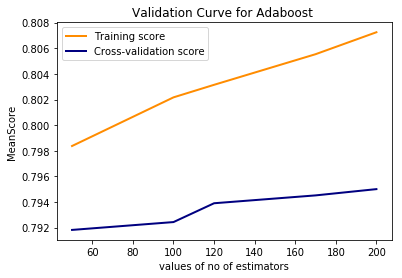

In [55]:
no_estimators_adaboost = [50,100,120,170,200]
train_scores, test_scores = validation_curve(AdaBoostClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'n_estimators',param_range = no_estimators_adaboost , cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Adaboost ")
plt.xlabel("values of no of estimators")
plt.ylabel("MeanScore")
lw = 2
plt.plot(no_estimators_adaboost, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(no_estimators_adaboost, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

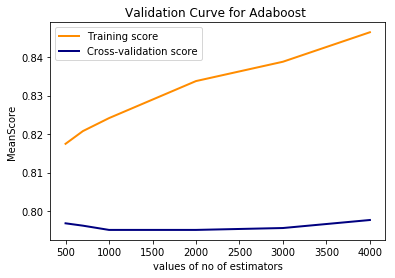

In [17]:
no_estimators_adaboost = [500,700,1000,2000,3000,4000]
train_scores, test_scores = validation_curve(AdaBoostClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'n_estimators',param_range = no_estimators_adaboost , cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Adaboost ")
plt.xlabel("values of no of estimators")
plt.ylabel("MeanScore")
lw = 2
plt.plot(no_estimators_adaboost, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(no_estimators_adaboost, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Mean Accuracy score is increasing with increase of estimators

### Learning Rate

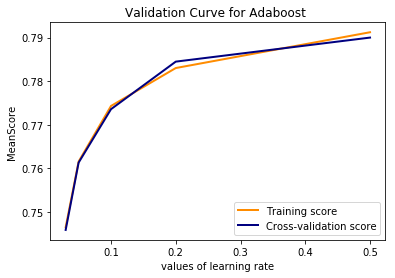

In [69]:
learningrate_adaboost = [0.03,0.05,0.1,0.2,0.5]
train_scores, test_scores = validation_curve(AdaBoostClassifier(), X = X_train, y = Y_train.values.ravel(),
                                            param_name = 'learning_rate',param_range = learningrate_adaboost , cv = 3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve for Adaboost ")
plt.xlabel("values of learning rate")
plt.ylabel("MeanScore")
lw = 2
plt.plot(learningrate_adaboost, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.plot(learningrate_adaboost, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

best accuracy is at learning rate = 0.5
accuracy increases as learning rate becomes closer to 1

In [92]:
adaboost2 = ensemble.AdaBoostClassifier(n_estimators =800,learning_rate=0.6)
adaboost2.fit(X_train,Y_train.values.ravel())
pred = adaboost2.predict(X_test)
accuracy1 = sklearn.metrics.accuracy_score(Y_test,pred, normalize=True, sample_weight=None)
print("Accuarcy:",accuracy1)


Accuarcy: 0.7852824682092975


In [93]:
adaboost1 = ensemble.AdaBoostClassifier(n_estimators =800,learning_rate=0.05)
adaboost1.fit(X_train,Y_train.values.ravel())
pred = adaboost1.predict(X_test)
accuracy1 = sklearn.metrics.accuracy_score(Y_test,pred, normalize=True, sample_weight=None)
print("Accuarcy:",accuracy1)

Accuarcy: 0.7886178861788617


Observation : Accuracy is increasing with increase in learning rate

### Using Grid Search CV

In [70]:
tuned_parameters1 =[{'n_estimators':[50,100,120,170,200,500,700,1000,2000],'learning_rate':[0.03,0.1,0.15,0.2,0.5]}]
adaptive = ensemble.AdaBoostClassifier()
adaptive = GridSearchCV(adaptive,tuned_parameters1,cv=3,scoring='roc_auc')
adaptive.fit(X_train,Y_train.values.ravel())
print("best params",adaptive.best_params_)
print("best score",adaptive.best_score_)
print("Best estimator",adaptive.best_estimator_)

best params {'learning_rate': 0.5, 'n_estimators': 2000}
best score 0.8607370401853892
Best estimator AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=2000, random_state=None)


### Tuning the model with best hyperparameters

In [91]:
adaboost3 = ensemble.AdaBoostClassifier(n_estimators =2000,learning_rate=0.5)
adaboost3.fit(X_train,Y_train.values.ravel())
pred = adaboost3.predict(X_test)
grid_adaboost3 = sklearn.metrics.accuracy_score(Y_test,pred, normalize=True, sample_weight=None)
print("Accuarcy:",grid_adaboost3)

Accuarcy: 0.7834062956014175


In [100]:
print(metrics.classification_report(Y_test,adaboost3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2994
           1       0.75      0.67      0.71      1803

    accuracy                           0.79      4797
   macro avg       0.78      0.77      0.77      4797
weighted avg       0.79      0.79      0.79      4797



In [88]:
print('Improvement of accuracy{:0.2f}%'.format( 100 * (grid_adaboost3 - base_adaBoost) / base_adaBoost))

Improvement of accuracy0.78%
